## Tarea 2

# a)
1) Consideren la función
$$
z_{n+1} = z_n^2 + c, 
$$
con c = -0.123 + 0.745im. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).
¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?
Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

In [1]:
using PyPlot

In [2]:
#crea función a iterar
function funcion(n::Int64,z0) #crea entradas para condicion inicial y numero de iteraciones
    c= complex(-0.123,0.745) #define valor inicial de c
    for i in 1:n
        z0= z0^2 + c
    end
    return z0 
end 


funcion (generic function with 1 method)

In [3]:
function condiciones_iniciales(real::Array{Float64},imaginario::Array{Float64},inter=[0.0025,0.0025]) #define la 
    #función que hará el arreglo de condiciones inciales
    
    dx= collect(real[1]:inter[1]:real[2]) #Construye los vectores para llenar las condiciones iniciales
    dy= collect(imaginario[1]:inter[2]:imaginario[2]) 
    n= length(dx) #define el número de entradas de la matriz según el número de entradas de los vectores antes definidos
    m= length(dy)
    condiciones=zeros(Complex{Float64},n,m) #Construye una matriz de ceros compleja
    for j in 1:m
        for i in 1:n
            condiciones[i,j]= dx[j]+im*dy[m+1-i] #Llena la matriz con los valores de los vectores dx y dy.
        end
    end 
    return condiciones
end 


condiciones_iniciales (generic function with 2 methods)

In [4]:
function funcionaiterar(f::Function,condiciones::Array{Complex{Float64},2}) #construye la función a iterar
    fini=zeros(condiciones) #evalúa la función en las condiciones iniciales
    for i in 1:length(condiciones)
        fini[i]=f(condiciones[i])
    end
    return fini
end

funcionaiterar (generic function with 1 method)

In [5]:
function iterando(n::Int,real=[-1.0,1.0],imaginario=[-1.0,1.0],inter=[0.0025,0.0025],F=funcion) 
    #Crea la función que iterará las condiciones iniciales, las comparará y escribirá
    condicionesini=condiciones_iniciales(real,imaginario,inter) #Llena la matriz de condiciones iniciales
    f(x)= funcion(n,x) #Llama la función antes creada
    fn=funcionaiterar(f,condicionesini) #Itera
    zn1=zeros(fn) #Llena la matriz de resultados con ceros 
    for i in 1:length(fn) 
        if abs(fn[i].re) < Inf && abs(fn[i].im) < Inf #Obtiene los resultados finitos, tanto reales como imaginarios
            zn1[i] = fn[i] #Los escribe en un arreglo
        end
    end
    return zn1
end 
    

iterando (generic function with 5 methods)

Veamos cuántas raíces tiene el polinomio y cuáles son con la función unique, que muestra los valores que se 
repiten en nuestro arreglo

In [6]:
it =iterando(3000);

In [7]:
unique(it) #Muestra los valores que se repiten en el arreglo
    

4-element Array{Complex{Float64},1}:
         0.0+0.0im        
   -0.122999+0.745im      
 0.000890582+0.000260601im
   -0.662897+0.561731im   

Son 4 las raíces obtenidas para la función f(x)= x² + c

Ahora, haciendo las gráficas para vender en playeras:

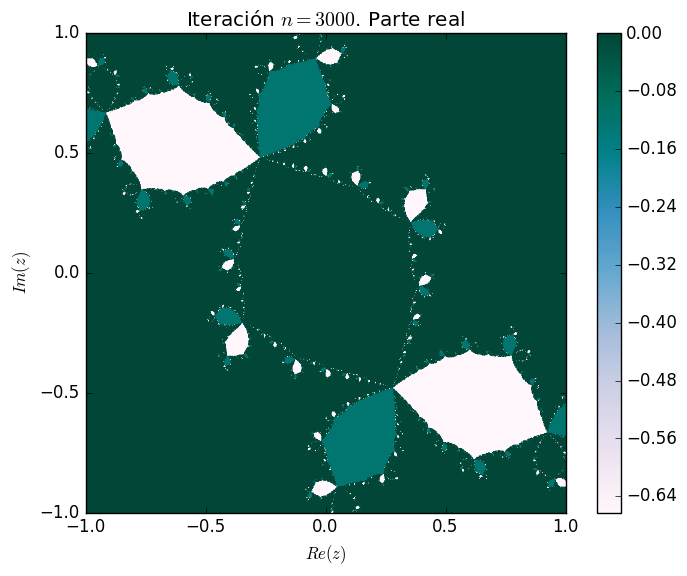

In [8]:
it =iterando(3000); #Realiza las gráficas
imshow(real(it),cmap = "PuBuGn", extent =[-1.0, 1.0, -1.0, 1.0])

xlabel(L"Re(z)")
ylabel(L"Im(z)")
title(L"Iteración $n=3000$. Parte real")
colorbar()

show()

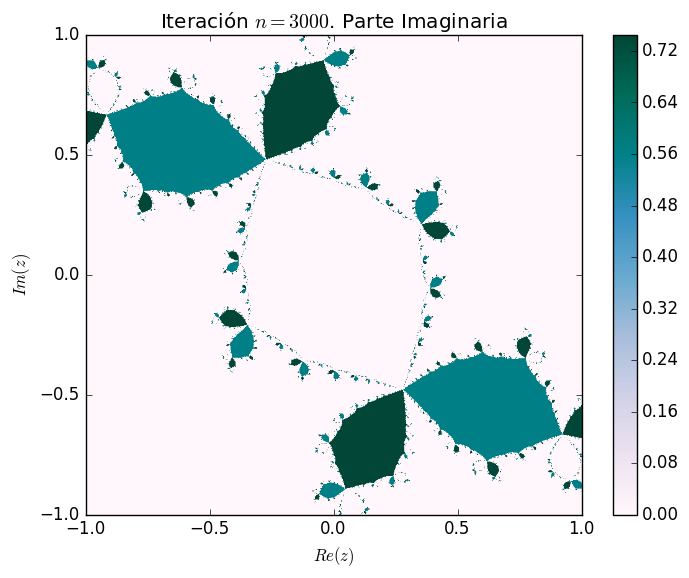

In [9]:
imshow(imag(it),cmap = "PuBuGn", extent =[-1.0, 1.0, -1.0, 1.0],aspect="auto")

xlabel(L"Re(z)")
ylabel(L"Im(z)")
title(L"Iteración $n=3000$. Parte Imaginaria")
colorbar()

show()

# b)

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

In [10]:
function B(a,it)  # se hace la función B indicada en el ejercico
    x=0           # se declara una variable local que sirve de apoyo en el ciclo
    y=Float64[a]  # se declara un arreglo del tipo Float64 que guardará los valores del mapeo
    for i in 1:it # se inicia el ciclo con las iteraciones definidas por el usuario
        x=mod(2*a,1) # se calcula el mapeo y se guarda el resultado en la variable de apoyo
        a=x          # se re define la condición inicial
        push!(y,a)   # se guarda en el arreglo y el valor del mapeo
        
    end
    y                 #se muestra el conjunto de valores del mapeo despues de it iteraciones 
    
end

B (generic function with 1 method)

In [11]:
c=B(0.4,100)

101-element Array{Float64,1}:
 0.4
 0.8
 0.6
 0.2
 0.4
 0.8
 0.6
 0.2
 0.4
 0.8
 0.6
 0.2
 0.4
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

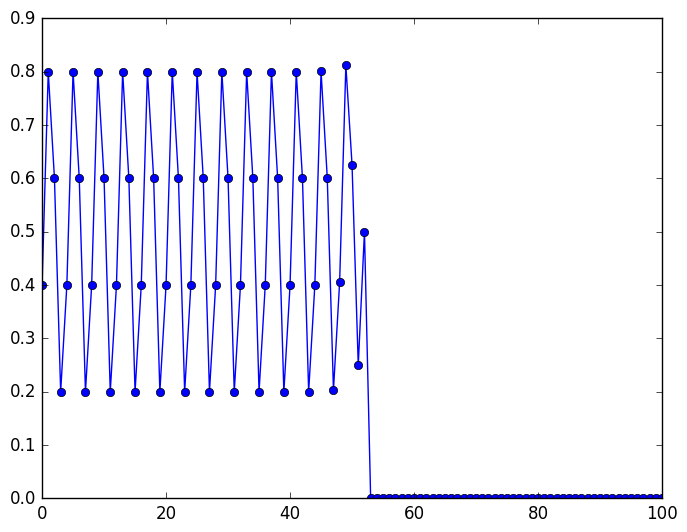

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff5c2de98d0>

In [12]:
plot(c,"-o")